## Importing Libraries

In [14]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Loading the CSV file 

In [15]:
df=pd.read_csv(r"Multiple CSV/4.linearsep.csv",header=None) 
df.head() 

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [51]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

2
1.0    50
0.0    48
Name: count, dtype: int64

## checking outliers

<Axes: ylabel='0'>

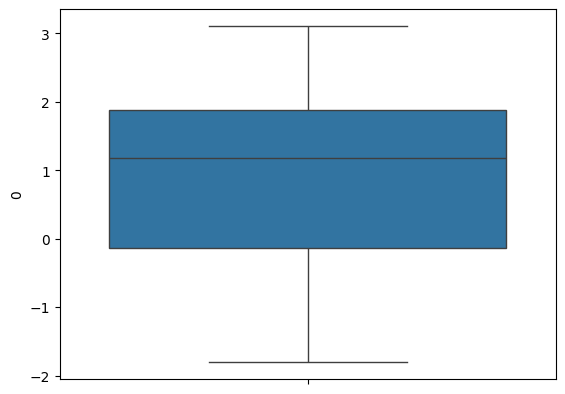

In [18]:
sns.boxplot(df[0]) 

<Axes: ylabel='1'>

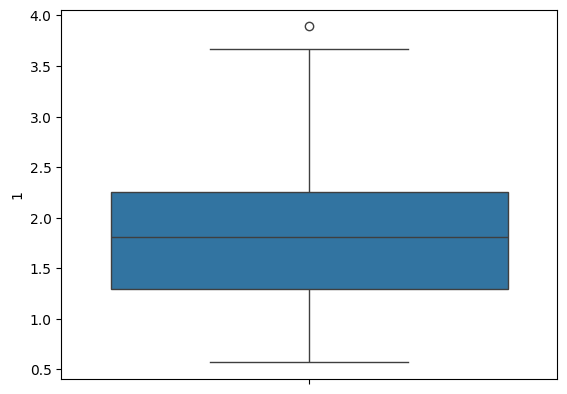

In [19]:
sns.boxplot(df[1]) 

In [23]:
# removing the outliers
df=df[df[1]<3.6] 

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       98 non-null     float64
 1   1       98 non-null     float64
 2   2       98 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB


<Axes: ylabel='1'>

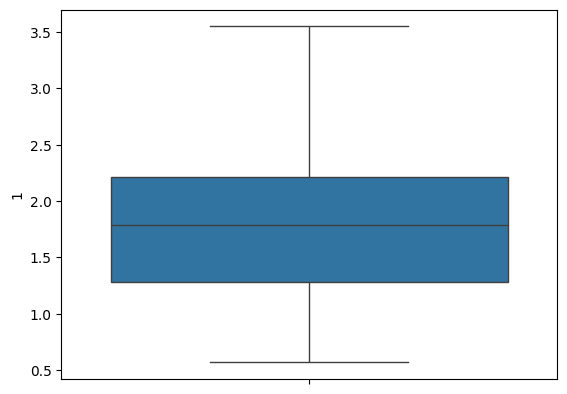

In [25]:
sns.boxplot(df[1])  

## Identifying Input and Output Features

In [26]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)  

## Spliting the data into train and test

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardising input features 

In [32]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure 

In [33]:
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [41]:
model=Sequential()
model.add(Dense(6,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

**Observation:**
- As the data is not much complex, tanh activation function is used.
- As model is overfitting, Regularization is used as Lasso with 0.001 learning rate.
- As target variable contains binary class, In output layer i have used sigmoid as activation function.

In [42]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model 

In [43]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.1)  

Epoch 1/20
8/8 [==============================] - 1s 32ms/step - loss: 0.8213 - accuracy: 0.2911 - val_loss: 0.8578 - val_accuracy: 0.0000e+00
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 0.7968 - accuracy: 0.2911 - val_loss: 0.8278 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.7737 - accuracy: 0.3544 - val_loss: 0.7995 - val_accuracy: 0.1111
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 0.7518 - accuracy: 0.4051 - val_loss: 0.7727 - val_accuracy: 0.3333
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 0.7314 - accuracy: 0.4557 - val_loss: 0.7473 - val_accuracy: 0.4444
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.7119 - accuracy: 0.5063 - val_loss: 0.7230 - val_accuracy: 0.4444
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5949 - val_loss: 0.7000 - val_accuracy: 0.5556
Epoch 8/20
8/8 [========

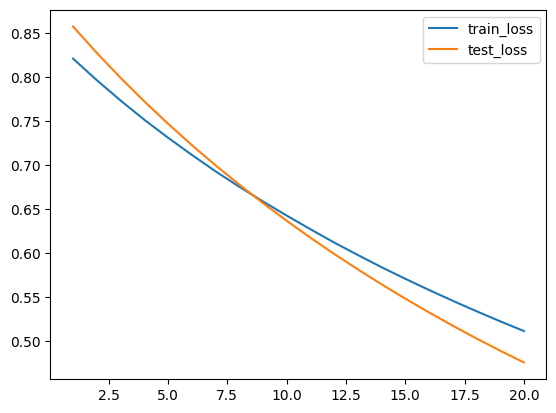

In [44]:
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model

In [45]:
predicted=model.predict(x_test) 
predicted    

1/1 [==============================] - 0s 112ms/step


array([[0.35657474],
       [0.4022385 ],
       [0.38883555],
       [0.37556168],
       [0.58582413],
       [0.5645532 ],
       [0.33565804],
       [0.42801887],
       [0.35750246],
       [0.6528859 ]], dtype=float32)

In [46]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

## Evaluating the model

1.0


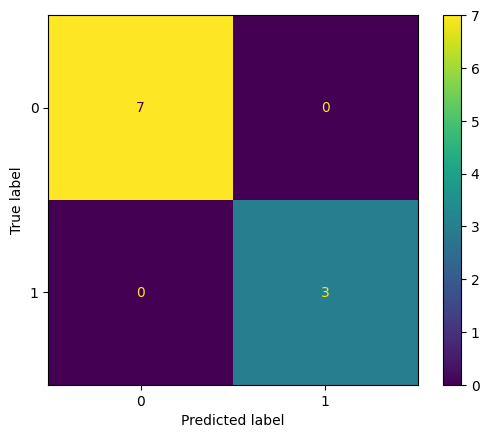

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTING THE DECISION SURFACE 

In [48]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

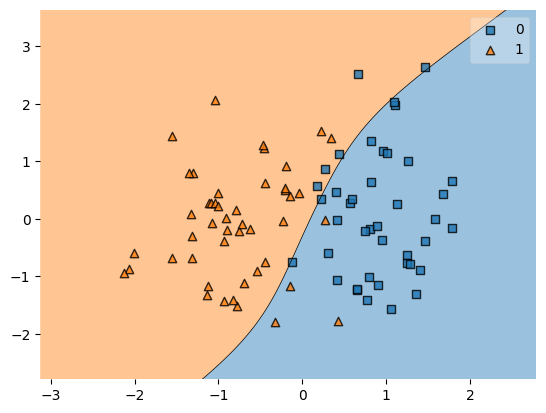

In [49]:
# Decision surface for train data
plot_decision_regions(x_train,y_train.values,clf=model)   

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

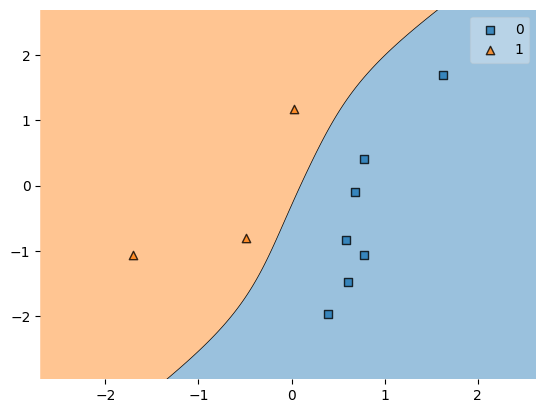

In [50]:
# Decision surface for test data
plot_decision_regions(x_test,y_test.values,clf=model) 

## Conclusions:

- This neural network model achieves an accuracy of  100%.
            
#### The model architecture consists of 2 hidden layers: 
- In the first hidden layer, there are 6 neurons with the tanh activation function 
- In the second hidden layer, there are 3 neurons with the tanh activation function 

- The output layer uses the sigmoid activation function.

### In model compilation,

- Loss function is Binary cross-entropy.
- Optimizer is Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 20 epochs.
 
#### Overall, this neural network model architecture and training configuration achieve an accuracy of 100%.    